### Species Segmentation with Cluster Analysis

In [5]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [6]:
# Load the data
data = pd.read_csv('iris_dataset.csv')
# Check the data
data

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


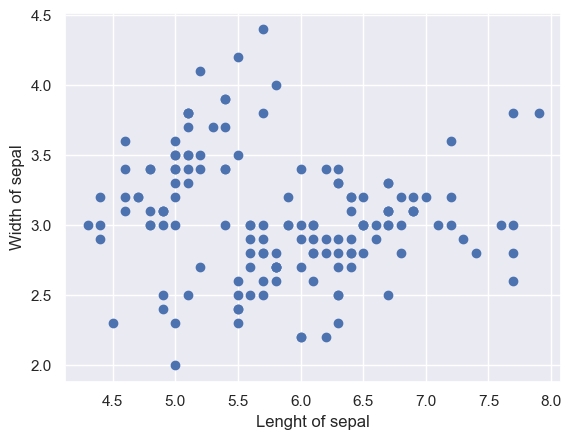

In [7]:
# create a scatter plot based on two corresponding features (sepal_length and sepal_width; OR petal_length and petal_width)
plt.scatter(data['sepal_length'],data['sepal_width'])
# name your axes
plt.xlabel('Lenght of sepal')
plt.ylabel('Width of sepal')
plt.show()

In [8]:
# create a variable which will contain the data for the clustering
x = data.copy()
# create a k-means object with 2 clusters
kmeans = KMeans(2)
# fit the data
kmeans.fit(x)

KMeans(n_clusters=2)

In [9]:
# create a copy of data, so we can see the clusters next to the original data
clusters = data.copy()
# predict the cluster for each observation
clusters['cluster_pred']=kmeans.fit_predict(x)

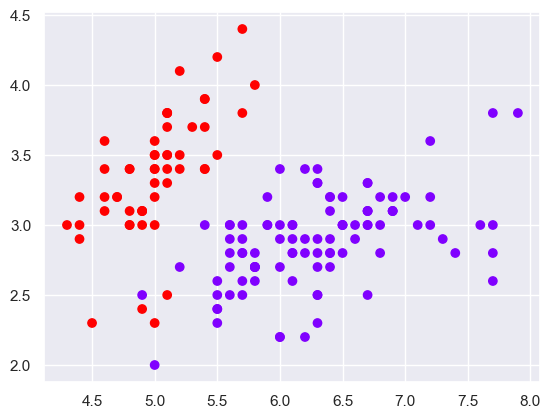

In [10]:
# create a scatter plot based on two corresponding features (sepal_length and sepal_width; OR petal_length and petal_width)
plt.scatter(clusters['sepal_length'], clusters['sepal_width'], c= clusters ['cluster_pred'], cmap = 'rainbow')

In [11]:
# import some preprocessing module
from sklearn import preprocessing

# scale the data for better results
x_scaled = preprocessing.scale(data)

In [12]:
# create a k-means object with 2 clusters
kmeans_scaled = KMeans(2)
# fit the data
kmeans_scaled.fit(x_scaled)

KMeans(n_clusters=2)

In [13]:
# create a copy of data, so we can see the clusters next to the original data
clusters_scaled = data.copy()
# predict the cluster for each observation
clusters_scaled['cluster_pred']=kmeans_scaled.fit_predict(x_scaled)

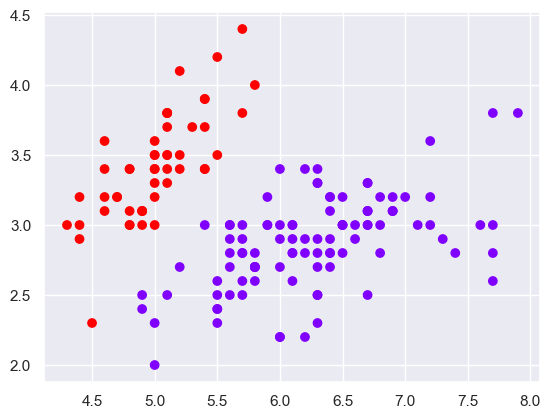

In [14]:
# create a scatter plot based on two corresponding features (sepal_length and sepal_width; OR petal_length and petal_width)
plt.scatter(clusters_scaled['sepal_length'], clusters_scaled['sepal_width'], c= clusters_scaled ['cluster_pred'], cmap = 'rainbow')

In [15]:
wcss = []
# 'cl_num' is a that keeps track the highest number of clusters we want to use the WCSS method for. 
# We have it set at 10 right now, but it is completely arbitrary.
cl_num = 10
for i in range (1,cl_num):
    kmeans= KMeans(i)
    kmeans.fit(x_scaled)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
wcss

[600.0,
 223.73200573676348,
 142.1106371310419,
 114.61550694959809,
 91.29347638670737,
 82.26465062386933,
 77.17777609354086,
 67.63575309938443,
 59.20313952867069]

Text(0, 0.5, 'Within-cluster Sum of Squares')

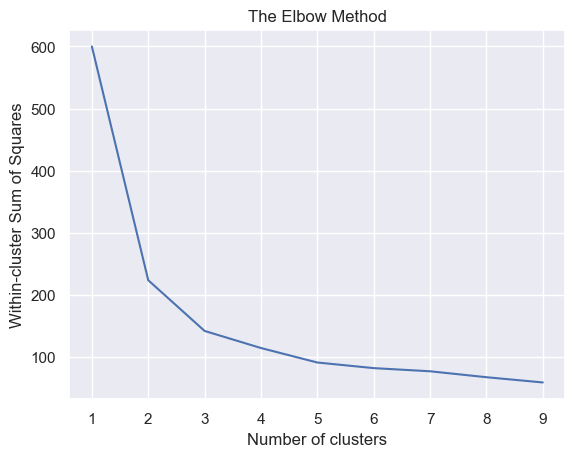

In [16]:
number_clusters = range(1,cl_num)
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')